In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('finalDataset_v0.csv')
# df

In [2]:
df.columns

Index(['id', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year'],
      dtype='object')

K - Nearest Neighbours algorithm

In [9]:
# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import StandardScaler
# import joblib

# features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo', 'duration_ms', 'time_signature', 'year']

# # Extracting features and song IDs
# X = df[features]
# song_ids = df['id']

# # Scaling the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Initialize the Nearest Neighbors model
# k_neighbors = 15  # the number of neighbors 
# model = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
# model.fit(X_scaled)

# # Save the trained model using joblib
# model_filename = 'knn_model.joblib'
# joblib.dump(model, model_filename)

['knn_model.joblib']

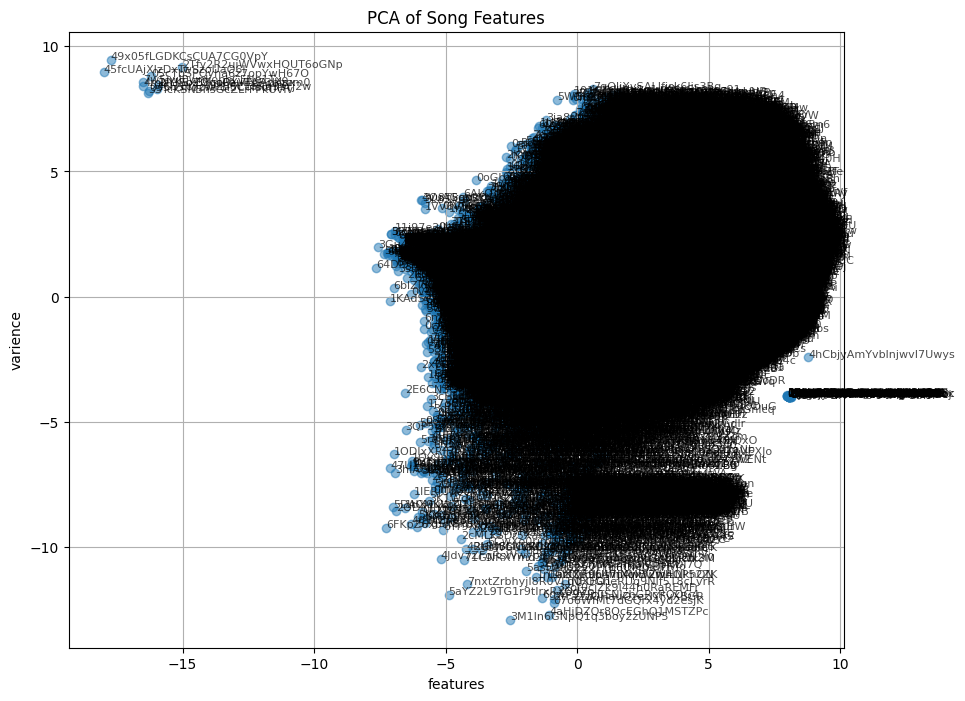

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import joblib

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your CSV file

features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature', 'year']

# Extracting features and song IDs
X = df[features]
song_ids = df['id']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Nearest Neighbors model
k_neighbors = 1000  # the number of neighbors 
model = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
model.fit(X_scaled)

# Save the trained model using joblib
model_filename = 'knn_model.joblib'
joblib.dump(model, model_filename)

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Add labels to points
for i, txt in enumerate(song_ids):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

plt.title('PCA of Song Features')
plt.xlabel('features')
plt.ylabel('varience')
plt.grid()
plt.show()


In [4]:
model_filename = 'knn_model_1m.joblib'
joblib.dump(model, model_filename)

['knn_model_1m.joblib']

In [15]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Add labels to points
for i, txt in enumerate(song_ids):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

plt.title('PCA of Song Features')
plt.xlabel('features')
plt.ylabel('varience')
plt.grid()
plt.show()

KeyboardInterrupt: 

In [5]:
# allFeaturedDataset = pd.read_csv('tracks_features.csv')
allFeaturedDataset = pd.read_csv('1mDataset.csv')

In [9]:
# Function to recommend song based on a given song ID and output its name, artist, and distances
def recommendSong(songId):
    # get the index of the song ID
    song_index = df[df['id'] == songId].index[0] 
    print('song index',song_index)
    query_song_features = X_scaled[song_index].reshape(1, -1)
    print('song inquery_song_featuresdex',query_song_features)
    # Find the k nearest neighbours of the queried song
    distances, indices = model.kneighbors(query_song_features)
    
    # Get recommended song IDs
    recommended_song_ids = song_ids.iloc[indices[0]].values.tolist()
    
    # Get the names of the recommended songs and their artists
    recommendations = allFeaturedDataset[allFeaturedDataset['id'].isin(recommended_song_ids)][['name', 'artists','id']]
    
    # Add the corresponding distances to the recommendations
    recommendations['distance'] = distances[0]
    
    # Sort the DataFrame by distance (ascending)
    recommendations = recommendations.sort_values(by='distance', ascending=True)
    
    return recommendations

# Example usage
input_song_id = '2K7kHKYCiqQ2Fg9Wr5g8cG' 
recommended_songs = recommendSong(input_song_id)

# Display the recommended songs
print("Recommended Songs:")
print(recommended_songs)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
input_song_id = '2VHERYGLjjU5fqR0SFTUYm' 
recommended_songs = recommendSong(input_song_id)

# Display the recommended songs
print("Recommended Songs:")
print(recommended_songs)

song index 3335
song inquery_song_featuresdex [[-0.27141953  0.58202679 -0.05389612  0.22768847  0.52994718  0.70048333
  -0.44290801  0.15685587 -0.74952765 -0.18571184 -0.42305775 -0.76554186
  -0.33687356  0.29875163  0.71376663]]
Recommended Songs:
                                         name  \
592      Rasaathi Nenja - Madras Gig Season 2   
1314                            Endrum Unnodu   
1641                                 BoRdErSz   
2316                                Thamarasa   
2627                                Thamarasa   
...                                       ...   
1207170                    El cuadro perfecto   
1207818         I Kardia Ponaei Otan Psilonei   
1208980                                  Leap   
1209003                           It Ain't Me   
1209014                  Too Good at Goodbyes   

                                  artists                      id  distance  
592      Yuvan Shankar Raja, Dharan Kumar  0H1Uhrit1CxZzGBgsAz4at  0.000000  
13

In [3]:
import pandas as pd

# Load the CSV files
extracted_data = pd.read_csv('extracted_data_v1.csv')
final_data = pd.read_csv('finaldataset.csv')

# Select the required fields from extracted_data
extracted_fields = extracted_data[['id', 'explicit', 'danceability', 'energy', 'key', 
                                    'loudness', 'mode', 'speechiness', 'acousticness', 
                                    'instrumentalness', 'liveness', 'valence', 'tempo', 
                                    'duration_ms', 'time_signature', 'year']]

# Convert explicit values from True/False to 1/0
extracted_fields['explicit'] = extracted_fields['explicit'].astype(int)

# Select the required fields from final_data
final_fields = final_data[['id', 'explicit', 'danceability', 'energy', 'key', 
                            'loudness', 'mode', 'speechiness', 'acousticness', 
                            'instrumentalness', 'liveness', 'valence', 'tempo', 
                            'duration_ms', 'time_signature', 'year']]

# Convert explicit values from True/False to 1/0 in final_data
final_fields['explicit'] = final_fields['explicit'].astype(int)

# Combine the DataFrames
combined_data = pd.concat([extracted_fields, final_fields], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('finaldataset_v0.csv', index=False)


C:\Users\Nipuna Muhandiram\AppData\Local\Temp\ipykernel_13568\918377321.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_fields['explicit'] = extracted_fields['explicit'].astype(int)


In [4]:
import pandas as pd

# Load the CSV files
extracted_data = pd.read_csv('extracted_data_v1.csv')
final_data = pd.read_csv('finaldataset.csv')

# Select the required fields from extracted_data
extracted_fields = extracted_data[['id', 'explicit', 'danceability', 'energy', 'key', 
                                    'loudness', 'mode', 'speechiness', 'acousticness', 
                                    'instrumentalness', 'liveness', 'valence', 'tempo', 
                                    'duration_ms', 'time_signature', 'year']]

# Convert explicit values from True/False to 1/0
extracted_fields['explicit'] = extracted_fields['explicit'].astype(int)

# Select the required fields from final_data
final_fields = final_data[['id', 'explicit', 'danceability', 'energy', 'key', 
                            'loudness', 'mode', 'speechiness', 'acousticness', 
                            'instrumentalness', 'liveness', 'valence', 'tempo', 
                            'duration_ms', 'time_signature', 'year']]

# Convert explicit values from True/False to 1/0 in final_data
final_fields['explicit'] = final_fields['explicit'].astype(int)

# Combine the DataFrames
combined_data = pd.concat([extracted_fields, final_fields], ignore_index=True)

# Fill empty fields with mean values
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numeric_columns] = combined_data[numeric_columns].fillna(combined_data[numeric_columns].mean())

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('finaldataset_v0.csv', index=False)


C:\Users\Nipuna Muhandiram\AppData\Local\Temp\ipykernel_13568\2172305968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_fields['explicit'] = extracted_fields['explicit'].astype(int)


In [1]:
import pandas as pd

# Load the first CSV file
df1 = pd.read_csv('extracted_data_v1.csv')

# Load the second CSV file
df2 = pd.read_csv('tracks_features.csv')

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('1mDataset.csv', index=False)

print("Combined CSV saved as combined_file.csv")


Combined CSV saved as combined_file.csv
